This is the bike sharing dataset from Kaggle: https://www.kaggle.com/lakshmi25npathi/bike-sharing-dataset/activity


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
# Import dataset
df = pd.read_csv('hour.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [3]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [5]:
# Dropping the instant column as its just another index
df.drop('instant',axis=1,inplace=True)
# Converting the dteday to a datetime variable
df['dteday'] = pd.to_datetime(df['dteday'])

In [6]:
df['yr'] = df['dteday'].apply(lambda x : x.year)

I first want to check that there are an approximately equal number of data points for each season, year, month and weekday

<AxesSubplot:xlabel='season', ylabel='count'>

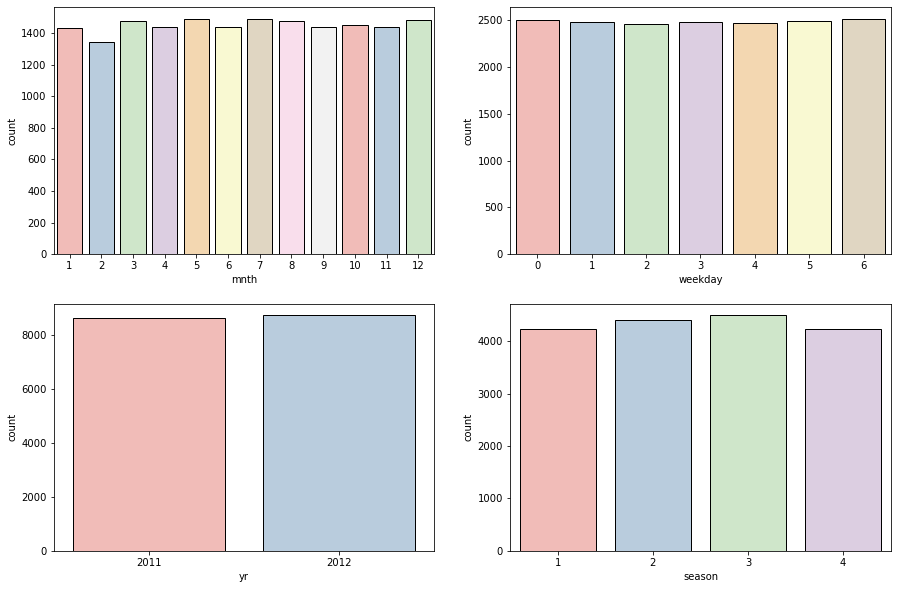

In [7]:
fig,axes = plt.subplots(2,2,figsize=(15,10))
axes = axes.ravel()
sns.countplot(x='mnth',
              data=df,ax=axes[0],
              palette='Pastel1',
             edgecolor='k')
sns.countplot(x='weekday',
              data=df,
              ax=axes[1],
             palette = 'Pastel1',
             edgecolor='k')
sns.countplot(x='yr',
              data=df,
              ax=axes[2],
             palette = 'Pastel1',
             edgecolor='k')
sns.countplot(x='season',
              data=df,
              ax=axes[3],
             palette = 'Pastel1',
             edgecolor='k')

Text(0, 0.5, 'Number of instances')

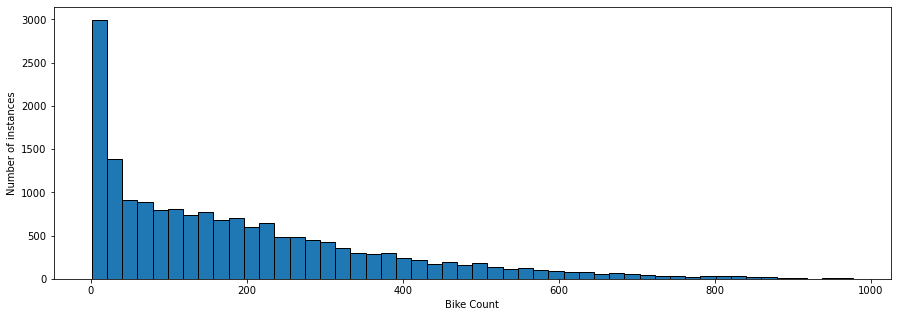

In [15]:
plt.figure(figsize=(15,5))
a,b,c = plt.hist(df.cnt,bins=50,edgecolor='k')
plt.xlabel('Bike Count')
plt.ylabel('Number of instances')

This dataset is particulary clean. Although this isn't representative of a real world dataset, I wanted to focus on ML with this data set rather than data cleaning

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [17]:
x = df.iloc[:,1:-3].values
y = df.iloc[:,-1].values
X_train, x_test, Y_train, y_test = train_test_split(x, y,random_state=42,test_size=0.33)

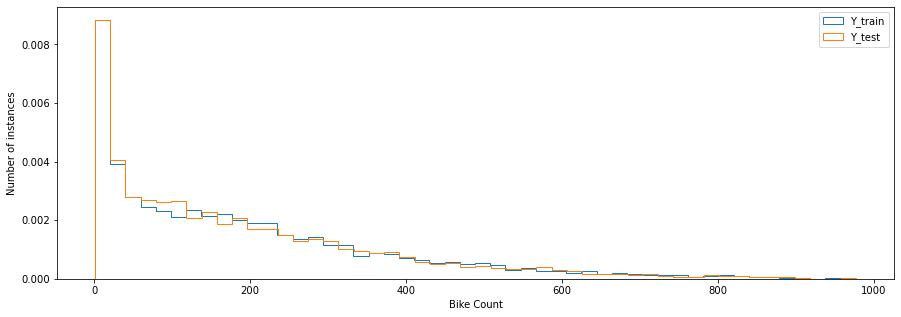

In [10]:
plt.figure(figsize=(15,5))
_ = plt.hist(Y_train,bins=50,label='Y_train',histtype='step',density=True)
_ = plt.hist(y_test,bins=50,label='Y_test',histtype='step',density=True)
plt.xlabel('Bike Count')
plt.ylabel('Number of instances')
plt.legend()

In [11]:
scaler = StandardScaler()

In [12]:
X_train = scaler.fit_transform(X_train)
x_test = scaler.transform(x_test)

In [13]:
lr = LinearRegression()
lrm = lr.fit(X_train,Y_train)

0.39139163128590015


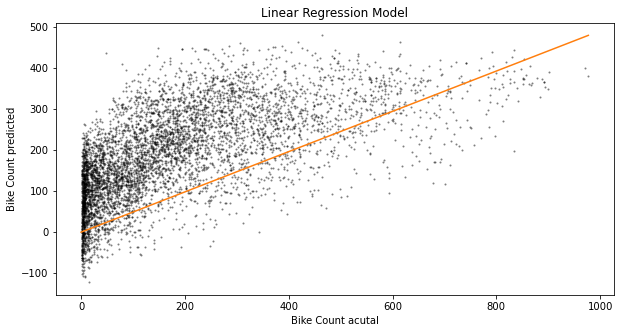

In [14]:
plt.figure(figsize=(10,5))
_ = plt.title('Linear Regression Model')
plt.plot(y_test,lrm.predict(x_test),
         linestyle='none',
         marker='o',
         mfc='none',
         mec='k',
        alpha=0.5,
        ms=1)
plt.plot(np.linspace(0,max(y_test)),np.linspace(0,max(lrm.predict(x_test))))
plt.xlabel('Bike Count acutal')
plt.ylabel('Bike Count predicted')
print(lrm.score(x_test,y_test))

In [45]:
LR_misfit = sum((y_test - lrm.predict(x_test).flatten())**2)

# Lets try a decision tree

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [17]:
param_dist = {'max_depth': np.arange(1,30),
              'min_samples_leaf':np.arange(1,60,3),
             'max_features':['auto', 'sqrt','log2']}
clf = GridSearchCV(DecisionTreeRegressor(), param_dist,cv=10)

In [18]:
clf.fit(X_train,Y_train)
clf.best_params_

{'max_depth': 28, 'max_features': 'auto', 'min_samples_leaf': 7}

In [32]:
best_tree = DecisionTreeRegressor(max_features= 'auto', max_depth= 20,min_samples_leaf=6)
best_tree.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=20, max_features='auto', min_samples_leaf=6)

0.9140270247679625


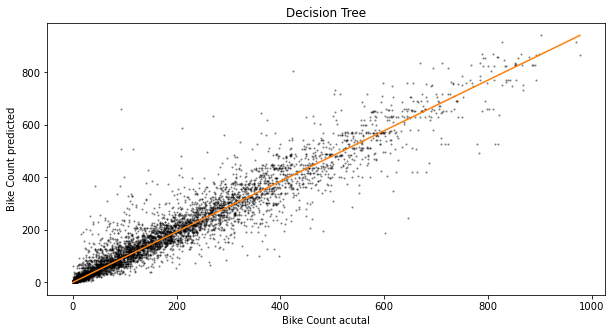

In [33]:
plt.figure(figsize=(10,5))
_ = plt.title('Decision Tree')
plt.plot(y_test,best_tree.predict(x_test),
         linestyle='none',
         marker='o',
         mfc='none',
         mec='k',
        alpha=0.5,
        ms=1)
plt.plot(np.linspace(0,max(y_test)),np.linspace(0,max(best_tree.predict(x_test))))
plt.xlabel('Bike Count acutal')
plt.ylabel('Bike Count predicted')
print(best_tree.score(x_test, y_test))

In [34]:
best_tree.predict(x_test)

array([355.14285714,  83.        ,  11.81818182, ..., 153.66666667,
       514.28571429, 125.875     ])

In [35]:
tree_misfit = sum((y_test - best_tree.predict(x_test).flatten())**2)

# Moving on to trying a neural network

Althought the decision tree did rather well I want to practice working with and tuning a neural network, so this next section focuses on that. 

In [12]:
# importing the Keras libs

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras.optimizers import SGD

Using TensorFlow backend.


In [13]:
# Defining the base model
def base_model(optimizer='adam'):
    model = Sequential()
    model.add(Dense(units=12,input_dim=12,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dense(units=7))
    model.add(Dense(units=1))
    model.compile(loss='mean_squared_error',optimizer=optimizer)
    return model

In [14]:
base_regressor = KerasRegressor(build_fn=base_model, epochs=100, batch_size=20,verbose=1)

In [53]:
# Work out the mean loss of each CV regressor on the data
accuracies = cross_val_score(estimator = base_regressor, X = X_train, y = Y_train, cv = 10, n_jobs = -1)

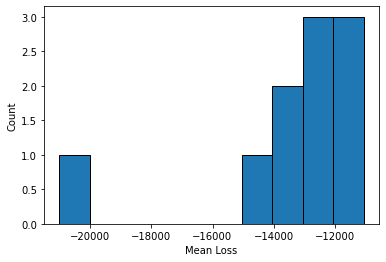

In [58]:
_ = plt.hist(accuracies,bins=10,edgecolor='k')
_ = plt.xlabel('Mean Loss')
_ = plt.ylabel('Count')

In [ ]:
# Appears one of the cross validation runs is doing much worse than the other 9

In [31]:
base_regressor = KerasRegressor(build_fn=base_model)

In [49]:
parameters = {'batch_size': [3,5,7,10],
              'epochs': [100,150,200,250],
             'optimizer': ['adam','RMSprop']}

In [50]:
grid_search = GridSearchCV(estimator = base_regressor,
                           param_grid = parameters,
                           cv=5,
                           n_jobs = -1)

In [52]:
grid__results = grid_search.fit(X_train, Y_train)

Epoch 1/150
11643/11643 [==============================] - 1s 113us/step - loss: 32917.7833
Epoch 2/150
11643/11643 [==============================] - 1s 107us/step - loss: 28479.5557
Epoch 3/150
11643/11643 [==============================] - 1s 106us/step - loss: 25969.5946
Epoch 4/150
11643/11643 [==============================] - 1s 105us/step - loss: 25352.0533
Epoch 5/150
11643/11643 [==============================] - 1s 105us/step - loss: 25023.7554
Epoch 6/150
11643/11643 [==============================] - 1s 106us/step - loss: 24774.6365
Epoch 7/150
11643/11643 [==============================] - 1s 106us/step - loss: 24497.6067
Epoch 8/150
11643/11643 [==============================] - 1s 105us/step - loss: 24359.3346
Epoch 9/150
11643/11643 [==============================] - 1s 107us/step - loss: 24037.7024
Epoch 10/150
11643/11643 [==============================] - 1s 105us/step - loss: 23721.5580
Epoch 11/150
11643/11643 [==============================] - 1s 105us/step - los

In [53]:
means = grid__results.cv_results_['mean_test_score']
stds = grid__results.cv_results_['std_test_score']
params = grid__results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

-21797.745114 (2636.204252) with: {'batch_size': 3, 'epochs': 100, 'optimizer': 'adam'}
-20942.128140 (1527.236376) with: {'batch_size': 3, 'epochs': 100, 'optimizer': 'RMSprop'}
-19268.904861 (2397.161382) with: {'batch_size': 3, 'epochs': 150, 'optimizer': 'adam'}
-20620.830377 (1749.366176) with: {'batch_size': 3, 'epochs': 150, 'optimizer': 'RMSprop'}
-19298.617692 (2460.417123) with: {'batch_size': 3, 'epochs': 200, 'optimizer': 'adam'}
-19099.484099 (2359.822475) with: {'batch_size': 3, 'epochs': 200, 'optimizer': 'RMSprop'}
-18557.744175 (2327.528570) with: {'batch_size': 3, 'epochs': 250, 'optimizer': 'adam'}
-18310.623373 (1908.891364) with: {'batch_size': 3, 'epochs': 250, 'optimizer': 'RMSprop'}
-19158.427285 (2040.867745) with: {'batch_size': 5, 'epochs': 100, 'optimizer': 'adam'}
-21210.490131 (2779.852832) with: {'batch_size': 5, 'epochs': 100, 'optimizer': 'RMSprop'}
-18683.790109 (2076.019715) with: {'batch_size': 5, 'epochs': 150, 'optimizer': 'adam'}
-16976.224501 (10

In [55]:
grid_search.best_params_

{'batch_size': 5, 'epochs': 150, 'optimizer': 'RMSprop'}

In [56]:
grid_search.best_score_

-16976.224500574543

In [57]:
best_NN_model = grid_search.best_estimator_.model

In [58]:
y_nn_pred = best_NN_model.predict(x_test)

Text(0, 0.5, 'Bike Count predicted')

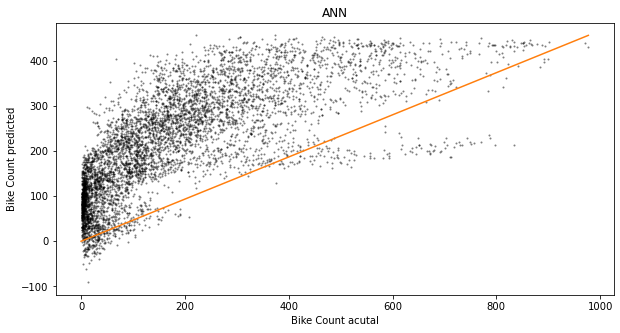

In [132]:
plt.figure(figsize=(10,5))
_ = plt.title('ANN')
plt.plot(y_test,y_nn_pred,
         linestyle='none',
         marker='o',
         mfc='none',
         mec='k',
        alpha=0.5,
        ms=1)
plt.plot(np.linspace(0,max(y_test)),np.linspace(0,max(y_nn_pred)))
plt.xlabel('Bike Count acutal')
plt.ylabel('Bike Count predicted')


The ANN is struggling to predict low numbers of bike counts, lets try reshaping the model

 # Take Two at neural net building

Okay, so the first attempt at the ANN performed much worse than the simple decision tree. Now I want to delve deeper into the structure of the NN to see if I can improve the score.

In [15]:
from keras.layers import InputLayer

In [16]:
def base_model2(n_hidden=1,n_neurons=30, learning_rate=3e-3,input_shape=[12],optimizer = 'RMSprop'):
    model = Sequential()
    model.add(InputLayer(input_shape=input_shape))
    for i in range(n_hidden):
        model.add(Dense(n_neurons,activation='relu'))
    model.add(Dense(units=1))
    model.compile(loss='mean_squared_error',optimizer=optimizer)
    return model

In [17]:
base_regressor_2 = KerasRegressor(build_fn=base_model2)

In [18]:
param_take2 = {
    'n_hidden': [7,8,9,10],
    'n_neurons':[20,25,30],
    'epochs':[150,200,250],
    'batch_size': [3,5,7],
    #'learning_rate':[3e-2,0.02,0.01,0.015,0.1]
}

In [19]:
X_train_sub,X_valid,y_train_sub,y_valid = train_test_split(X_train,Y_train,random_state=42)

In [22]:
random_search_cv = RandomizedSearchCV(base_regressor_2,param_take2,n_iter=20,cv=5,n_jobs=-1)
random_search_cv.fit(X_train_sub, y_train_sub,
                    validation_data=(X_valid,y_valid))

Train on 8732 samples, validate on 2911 samples
Epoch 1/200
8732/8732 [==============================] - 2s 219us/step - loss: 22252.4012 - val_loss: 16576.2965
Epoch 2/200
8732/8732 [==============================] - 2s 200us/step - loss: 14970.5321 - val_loss: 14614.0939
Epoch 3/200
8732/8732 [==============================] - 2s 210us/step - loss: 12452.7247 - val_loss: 11799.0168
Epoch 4/200
8732/8732 [==============================] - 2s 210us/step - loss: 10916.0848 - val_loss: 11805.0136
Epoch 5/200
8732/8732 [==============================] - 2s 218us/step - loss: 9288.7592 - val_loss: 8068.7689
Epoch 6/200
8732/8732 [==============================] - 2s 215us/step - loss: 7038.9143 - val_loss: 5565.7566
Epoch 7/200
8732/8732 [==============================] - 2s 205us/step - loss: 5368.2457 - val_loss: 4765.6250
Epoch 8/200
8732/8732 [==============================] - 2s 203us/step - loss: 4408.7956 - val_loss: 4684.2481
Epoch 9/200
8732/8732 [==============================] -

Epoch 146/200
8732/8732 [==============================] - 2s 201us/step - loss: 1290.1925 - val_loss: 2120.9494
Epoch 147/200
8732/8732 [==============================] - 2s 203us/step - loss: 1275.5246 - val_loss: 2079.6781
Epoch 148/200
8732/8732 [==============================] - 2s 200us/step - loss: 1263.1191 - val_loss: 2047.6756
Epoch 149/200
8732/8732 [==============================] - 2s 205us/step - loss: 1299.8429 - val_loss: 2138.4989
Epoch 150/200
8732/8732 [==============================] - 2s 207us/step - loss: 1269.6462 - val_loss: 2088.0114
Epoch 151/200
8732/8732 [==============================] - 2s 206us/step - loss: 1282.9720 - val_loss: 2083.0115
Epoch 152/200
8732/8732 [==============================] - 2s 206us/step - loss: 1252.6961 - val_loss: 2221.2659
Epoch 153/200
8732/8732 [==============================] - 2s 206us/step - loss: 1242.4023 - val_loss: 2376.2377
Epoch 154/200
8732/8732 [==============================] - 2s 203us/step - loss: 1254.5160 - val

RandomizedSearchCV(cv=5,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x000001BB701BF848>,
                   n_iter=20, n_jobs=-1,
                   param_distributions={'batch_size': [3, 5, 7],
                                        'epochs': [150, 200, 250],
                                        'n_hidden': [7, 8, 9, 10],
                                        'n_neurons': [20, 25, 30]})

In [23]:
random_search_cv.best_params_

{'n_neurons': 30, 'n_hidden': 8, 'epochs': 200, 'batch_size': 5}

In [24]:
random_search_cv.best_score_

-2197.8784861523322

In [25]:
best_NN_model_v2 = random_search_cv.best_estimator_.model
y_nn_pred_v2 = best_NN_model_v2.predict(x_test)

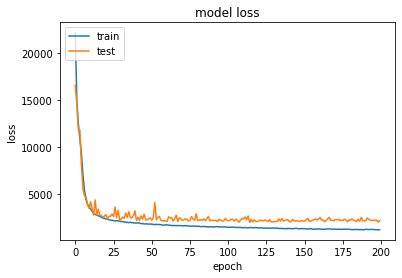

In [30]:
plt.plot(best_NN_model_v2.history.history['loss'])
plt.plot(best_NN_model_v2.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

Text(0, 0.5, 'Bike Count predicted')

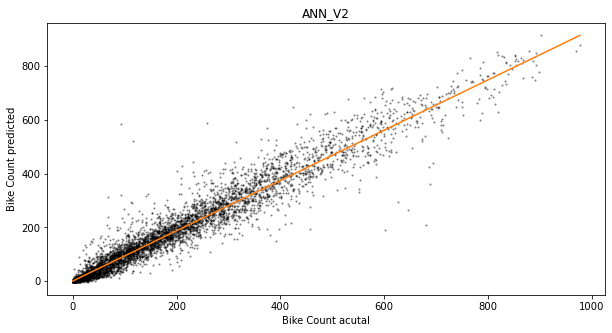

In [31]:
plt.figure(figsize=(10,5))
_ = plt.title('ANN_V2')
plt.plot(y_test,y_nn_pred_v2,
         linestyle='none',
         marker='o',
         mfc='none',
         mec='k',
        alpha=0.5,
        ms=1)
plt.plot(np.linspace(0,max(y_test)),np.linspace(0,max(y_nn_pred_v2)))
plt.xlabel('Bike Count acutal')
plt.ylabel('Bike Count predicted')


The second ANN does a much better job than the first NN, although there appears to be some degree of overfitting based on the history plot. To solve this I would consider adding a dropout later to the model.

In [36]:
ANN_misfit = sum((y_test - y_nn_pred_v2.flatten())**2)

In [37]:
ANN_misfit

11452618.239085604

In [38]:
tree_misfit

15731912.656766718

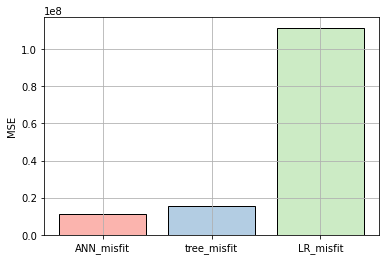

In [52]:
plt.bar(x =['ANN_misfit','tree_misfit','LR_misfit'], height=[ANN_misfit,tree_misfit,LR_misfit],
       color=sns.color_palette('Pastel1'),
       edgecolor='k')
_ = plt.ylabel('MSE')
_ = plt.grid()

We can see from the above that the ANN does the best job at predicting bike rentals, followed closely by the decision tree.